In [1]:
from google.colab import files
uploaded = files.upload()  # selecciona project-bacilos-tiled-split.zip


Saving project-bacilos-tiled-split.zip to project-bacilos-tiled-split.zip


In [2]:
import zipfile, os

zip_name = list(uploaded.keys())[0]
print("ZIP subido:", zip_name)

extract_dir = "/content/project-bacilos-tiled-split"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_name, "r") as zf:
    zf.extractall(extract_dir)

print("Descomprimido en:", extract_dir)
!ls -R /content/project-bacilos-tiled-split


ZIP subido: project-bacilos-tiled-split.zip
Descomprimido en: /content/project-bacilos-tiled-split
/content/project-bacilos-tiled-split:
images	labels

/content/project-bacilos-tiled-split/images:
train  val

/content/project-bacilos-tiled-split/images/train:
016c9b59-35_t0.jpg   4dd11fcb-12_t11.jpg  7decaae0-10_t6.jpg
016c9b59-35_t10.jpg  4dd11fcb-12_t1.jpg   7decaae0-10_t7.jpg
016c9b59-35_t1.jpg   4dd11fcb-12_t2.jpg   7decaae0-10_t8.jpg
016c9b59-35_t2.jpg   4dd11fcb-12_t3.jpg   8173dfa8-31_t10.jpg
016c9b59-35_t3.jpg   4dd11fcb-12_t4.jpg   8173dfa8-31_t11.jpg
016c9b59-35_t4.jpg   4dd11fcb-12_t5.jpg   8173dfa8-31_t1.jpg
016c9b59-35_t5.jpg   4dd11fcb-12_t6.jpg   8173dfa8-31_t2.jpg
016c9b59-35_t6.jpg   4dd11fcb-12_t7.jpg   8173dfa8-31_t3.jpg
016c9b59-35_t7.jpg   4dd11fcb-12_t8.jpg   8173dfa8-31_t4.jpg
016c9b59-35_t8.jpg   4dd11fcb-12_t9.jpg   8173dfa8-31_t6.jpg
016c9b59-35_t9.jpg   5d12626d-14_t0.jpg   8173dfa8-31_t7.jpg
04848d33-25_t10.jpg  5d12626d-14_t10.jpg  8173dfa8-31_t8.jpg
04848d

In [3]:
!nvidia-smi


Sun Nov 30 22:41:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             46W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [4]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00


In [5]:
data_yaml = """
path: /content/project-bacilos-tiled-split

train: images/train
val: images/val

nc: 1
names: ['bacilo']
"""

with open("/content/data.yaml", "w") as f:
    f.write(data_yaml)

!cat /content/data.yaml



path: /content/project-bacilos-tiled-split

train: images/train
val: images/val

nc: 1
names: ['bacilo']


In [6]:
from ultralytics import YOLO

# Modelo base pequeño (rápido). Luego puedes probar 'yolov8s.pt' si quieres más capacidad.
model = YOLO("yolov8n.pt")

model.train(
    data="/content/data.yaml",  # el config del dataset
    epochs=50,                  # puedes subir o bajar
    imgsz=640,                  # coincide con el tile
    batch=16,                   # ajusta según la memoria de la GPU
    device=0,                   # usa la GPU 0
    workers=2                   # hilos de dataloader
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=F

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e07482c9e80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
# Reusar el modelo ya entrenado (model) o cargar el best.pt explícitamente
# model = YOLO("/content/runs/detect/train/weights/best.pt")

results = model.predict(
    source="/content/project-bacilos-tiled-split/images/val",
    conf=0.3,   # umbral de confianza
    save=True   # guarda imágenes con predicciones dibujadas
)

results[:3]



image 1/92 /content/project-bacilos-tiled-split/images/val/016c9b59-35_t11.jpg: 640x640 7 bacilos, 9.1ms
image 2/92 /content/project-bacilos-tiled-split/images/val/04848d33-25_t0.jpg: 640x640 9 bacilos, 7.7ms
image 3/92 /content/project-bacilos-tiled-split/images/val/04848d33-25_t1.jpg: 640x640 6 bacilos, 7.6ms
image 4/92 /content/project-bacilos-tiled-split/images/val/04848d33-25_t2.jpg: 640x640 5 bacilos, 7.3ms
image 5/92 /content/project-bacilos-tiled-split/images/val/04848d33-25_t3.jpg: 640x640 11 bacilos, 7.4ms
image 6/92 /content/project-bacilos-tiled-split/images/val/04848d33-25_t9.jpg: 640x640 4 bacilos, 8.7ms
image 7/92 /content/project-bacilos-tiled-split/images/val/0adbfb8e-33_t0.jpg: 640x640 5 bacilos, 7.7ms
image 8/92 /content/project-bacilos-tiled-split/images/val/0c9d7201-2_t0.jpg: 640x640 2 bacilos, 7.5ms
image 9/92 /content/project-bacilos-tiled-split/images/val/0c9d7201-2_t5.jpg: 640x640 2 bacilos, 7.8ms
image 10/92 /content/project-bacilos-tiled-split/images/val/0c9

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bacilo'}
 obb: None
 orig_img: array([[[13, 13, 13],
         [28, 28, 28],
         [28, 28, 28],
         ...,
         [14, 14, 14],
         [22, 22, 22],
         [13, 13, 13]],
 
        [[13, 13, 13],
         [19, 19, 19],
         [17, 17, 17],
         ...,
         [27, 27, 27],
         [19, 19, 19],
         [30, 30, 30]],
 
        [[27, 27, 27],
         [23, 23, 23],
         [30, 30, 30],
         ...,
         [27, 27, 27],
         [18, 18, 18],
         [21, 21, 21]],
 
        ...,
 
        [[27, 27, 27],
         [30, 30, 30],
         [31, 31, 31],
         ...,
         [24, 24, 24],
         [29, 29, 29],
         [21, 21, 21]],
 
        [[21, 21, 21],
         [29, 29, 29],
         [26, 26, 26],
         ...,
         [19, 19, 19],
         [25, 25, 25],
         [18, 18, 18]],
 
        [[20, 20, 20],
    

016c9b59-35_t11.jpg


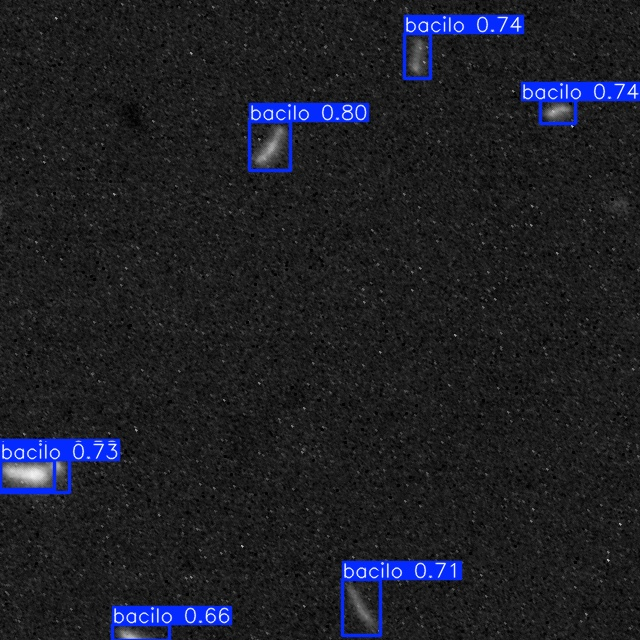

04848d33-25_t0.jpg


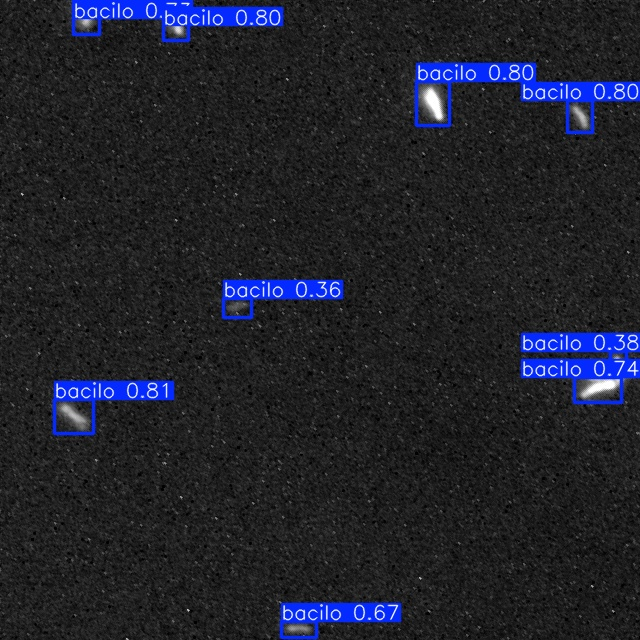

04848d33-25_t1.jpg


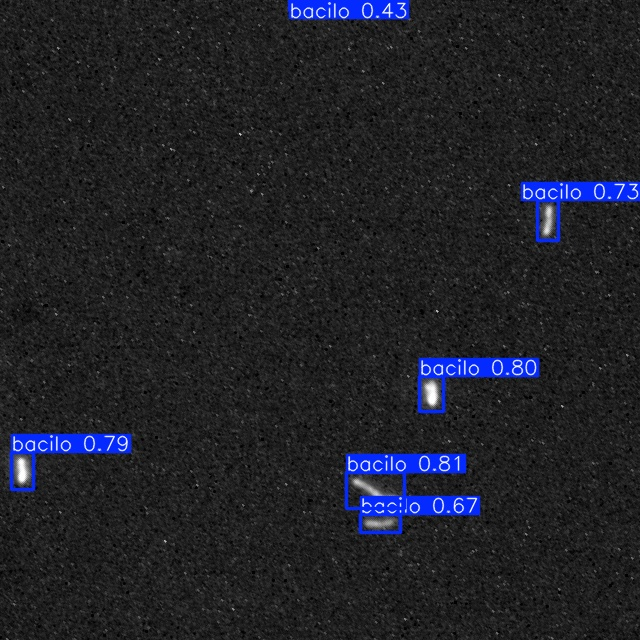

04848d33-25_t2.jpg


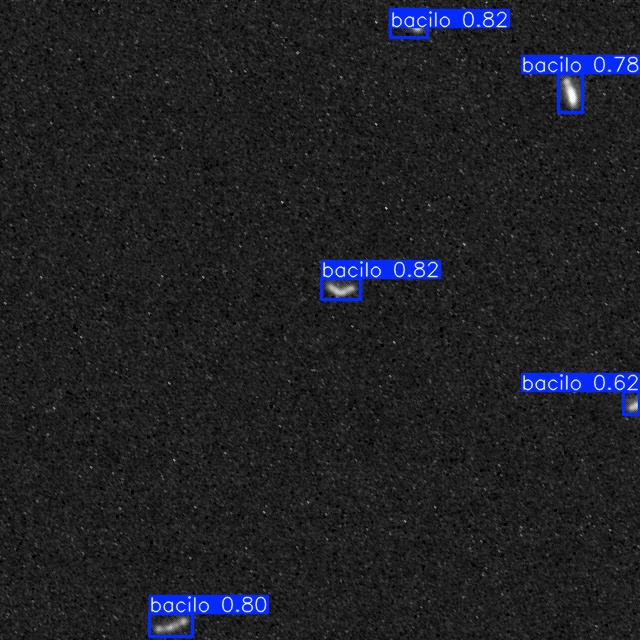

04848d33-25_t3.jpg


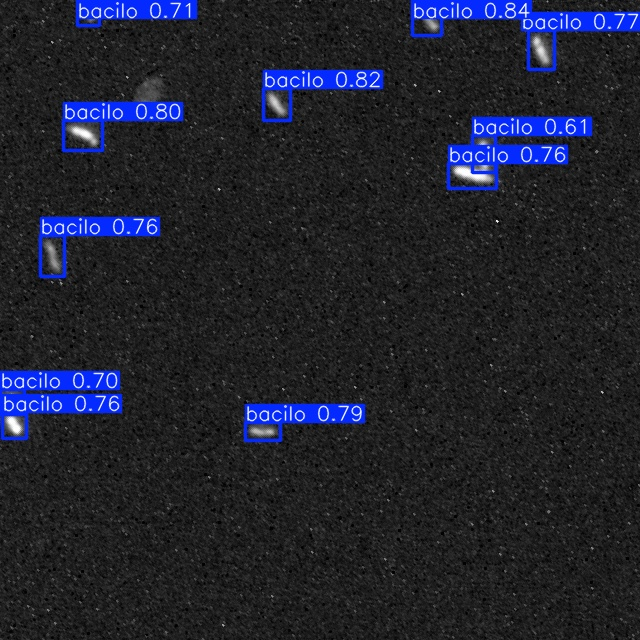

In [9]:
import os
from IPython.display import Image, display

pred_dir = "/content/runs/detect/predict"
files = sorted(os.listdir(pred_dir))

# mostrar las primeras 5
for fname in files[:5]:
    print(fname)
    display(Image(filename=os.path.join(pred_dir, fname)))


In [11]:
from ultralytics import YOLO

# Carga el mejor modelo entrenado
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Ejecuta validación sobre el mismo dataset
metrics = model.val(
    data="/content/data.yaml",  # el mismo data.yaml que usaste para entrenar
    imgsz=640,
    batch=16
)

metrics


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3165.3±1006.0 MB/s, size: 185.6 KB)
val: Scanning /content/project-bacilos-tiled-split/labels/val.cache... 92 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 92/92 207.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 3.7it/s 1.6s
                   all         92        497      0.927      0.894      0.943      0.521
Speed: 2.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e066ccf32c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [13]:
# metrics es lo que devuelve model.val()

# mp = mean precision, mr = mean recall, map50 = mAP@0.5, map = mAP@0.5:0.95
mp, mr, map50, map5095 = metrics.box.mean_results()

print("Precision media (mp)     :", mp)
print("Recall medio (mr)       :", mr)
print("mAP@0.5 (map50)         :", map50)
print("mAP@0.5:0.95 (map)      :", map5095)


Precision media (mp)     : 0.9269485483358092
Recall medio (mr)       : 0.8935907003948977
mAP@0.5 (map50)         : 0.9433872424662877
mAP@0.5:0.95 (map)      : 0.5214520849175445


In [14]:
print("p por clase:", metrics.box.p)   # precisión por clase
print("r por clase:", metrics.box.r)   # recall por clase


p por clase: [    0.92695]
r por clase: [    0.89359]
